In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import os
import seaborn as sns
import prepare as p

from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import explore as e
import acquire as a

In [2]:
store = a.get_store_data()

File exists, pulling from system.


In [3]:
store.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
store = p.prepare_store(store)

In [5]:
store.head()

,item_id,item_brand,item_name,item_price,sale_amount,store_address,month,year,sales_total,location
sale_date,,,,,,,,,,
2013-01-01,1,Riceland,Riceland American Jazmine Rice,0.84,13,12125 Alamo Ranch Pkwy,1,2013,13.84,Alamo Ranch
2013-01-02,1,Riceland,Riceland American Jazmine Rice,0.84,11,12125 Alamo Ranch Pkwy,1,2013,11.84,Alamo Ranch
2013-01-03,1,Riceland,Riceland American Jazmine Rice,0.84,14,12125 Alamo Ranch Pkwy,1,2013,14.84,Alamo Ranch
2013-01-04,1,Riceland,Riceland American Jazmine Rice,0.84,13,12125 Alamo Ranch Pkwy,1,2013,13.84,Alamo Ranch
2013-01-05,1,Riceland,Riceland American Jazmine Rice,0.84,10,12125 Alamo Ranch Pkwy,1,2013,10.84,Alamo Ranch


In [6]:
store.groupby(store.index.year)['sales_total'].sum()

sale_date
2013     8883016.0
2014    10077255.0
2015    10478660.0
2016    11301513.2
2017    11675513.0
Name: sales_total, dtype: float64

In [7]:
store.value_counts('year')

year
2016    183000
2013    182500
2014    182500
2015    182500
2017    182500
Name: count, dtype: int64

In [8]:
# When setting multiple years using .loc -- must slice

train = store.loc['2015']
validate = store.loc['2016']
test = store.loc['2017']

In [9]:
train.head()

,item_id,item_brand,item_name,item_price,sale_amount,store_address,month,year,sales_total,location
sale_date,,,,,,,,,,
2015-01-01,1,Riceland,Riceland American Jazmine Rice,0.84,11,12125 Alamo Ranch Pkwy,1,2015,11.84,Alamo Ranch
2015-01-02,1,Riceland,Riceland American Jazmine Rice,0.84,19,12125 Alamo Ranch Pkwy,1,2015,19.84,Alamo Ranch
2015-01-03,1,Riceland,Riceland American Jazmine Rice,0.84,16,12125 Alamo Ranch Pkwy,1,2015,16.84,Alamo Ranch
2015-01-04,1,Riceland,Riceland American Jazmine Rice,0.84,14,12125 Alamo Ranch Pkwy,1,2015,14.84,Alamo Ranch
2015-01-05,1,Riceland,Riceland American Jazmine Rice,0.84,14,12125 Alamo Ranch Pkwy,1,2015,14.84,Alamo Ranch


## Finding out if item_upc is going to be the same between all stores, if they're arbitrary numbers, or relative to product type
    - Dropped because item_id can be used in same manner

In [53]:
data = []


for item in train.columns:
    data.append(item)
    data.append(train[item].nunique())

#data = pd.DataFrame(data, columns=['col_name'])

i = iter(data)
b = dict(zip(i, i))
# data['n_uniq'] = data[data.index % 2 != 0]
pd.DataFrame([b]).T

,0
item_id,50
item_brand,49
item_name,50
item_price,47
sale_amount,185
store_address,10
month,12
year,1
sales_total,3932
location,10


## Checking Distributions of Sales Values

In [11]:
columns = ['item_price','sales_total','sale_amount']

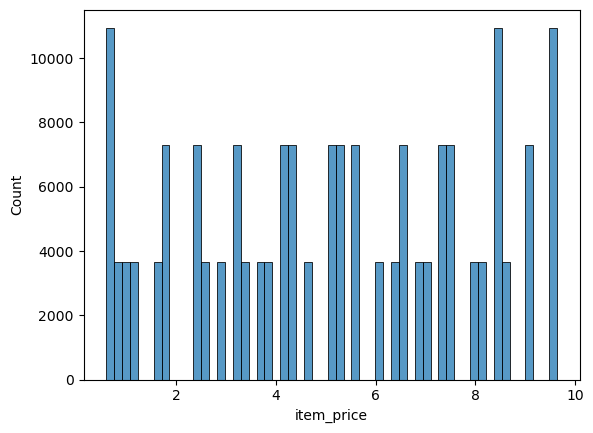

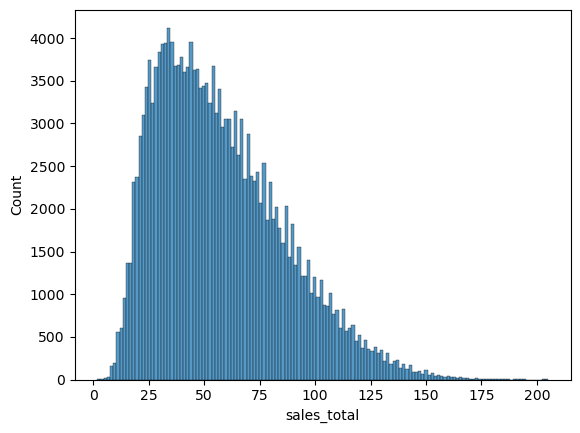

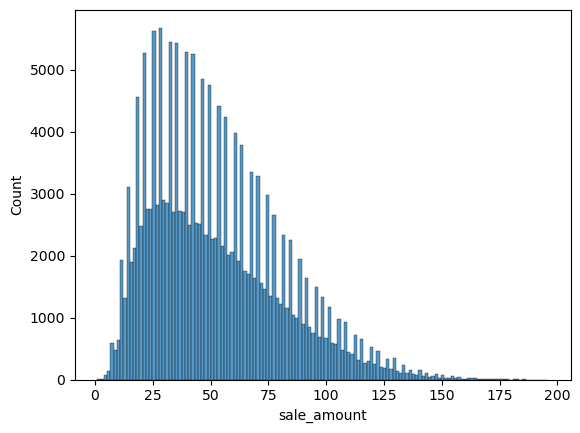

In [12]:
p.check_distributions(train,columns)

## Analyze distributions of Sale numbers by the year

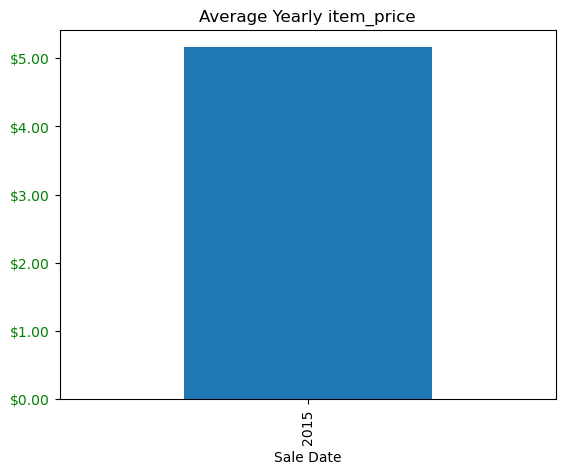

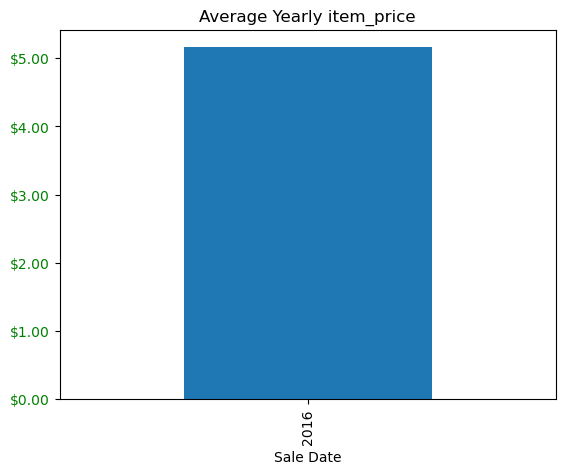

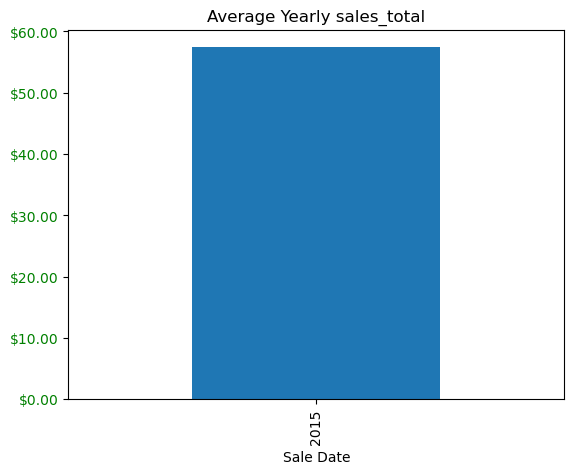

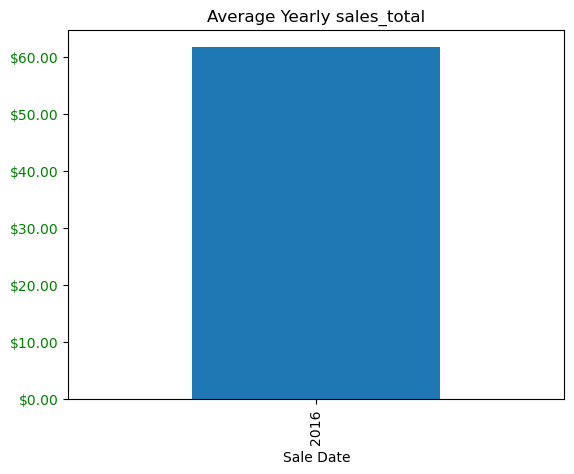

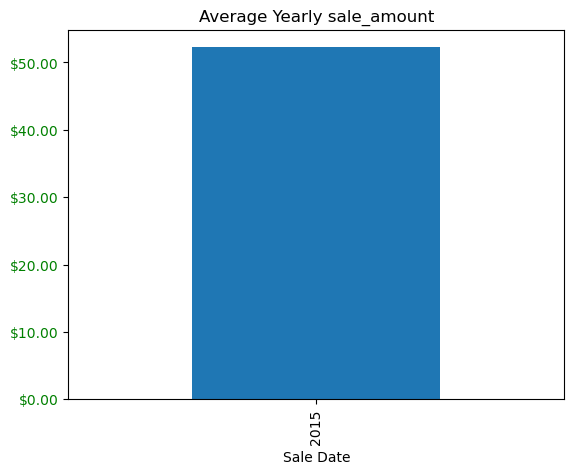

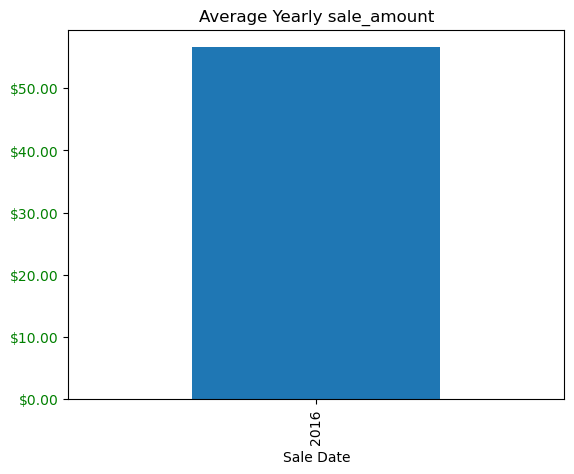

In [13]:
e.check_year(train,validate,columns)

In [14]:
store.groupby(store.index.year)['sales_total'].sum()

sale_date
2013     8883016.0
2014    10077255.0
2015    10478660.0
2016    11301513.2
2017    11675513.0
Name: sales_total, dtype: float64

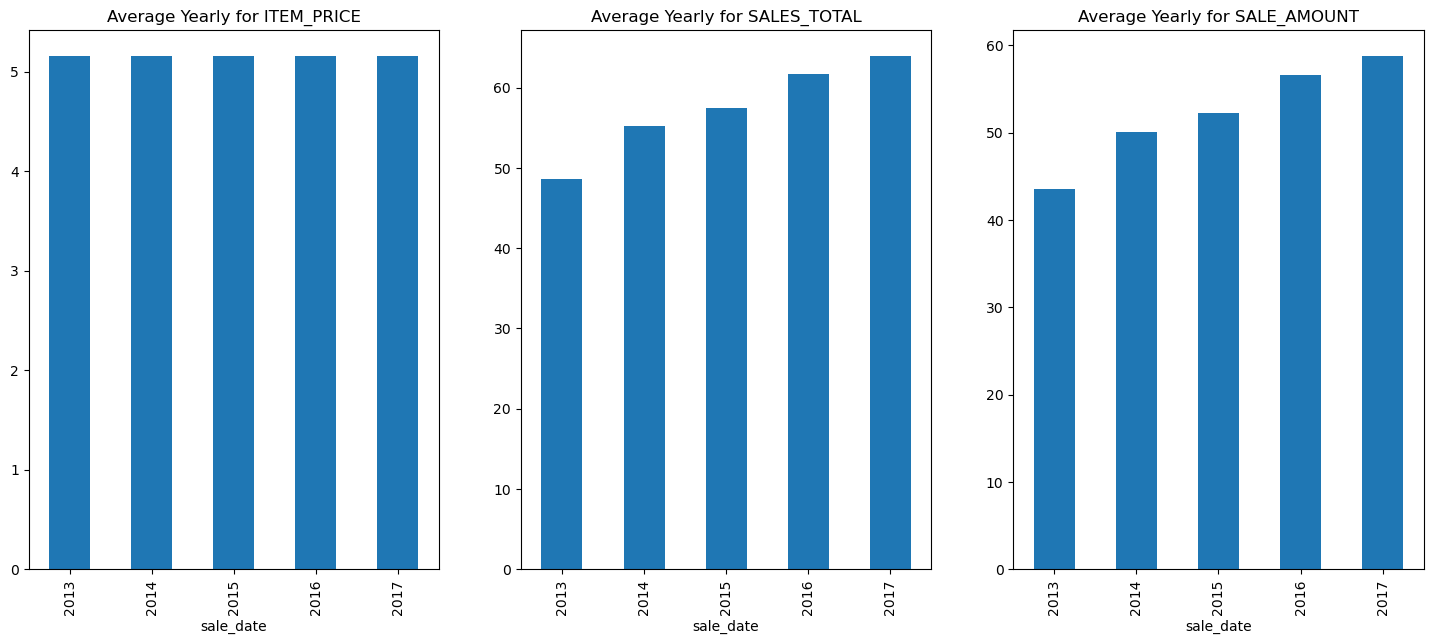

In [15]:
plt.figure(figsize=(18,7))
for i, col in enumerate(columns):
    subplot_num = i+1
    plt.subplot(1,3,subplot_num)
    plt.title(f'Average Yearly for {col.upper()}')
    store.groupby(store.index.year)[col].mean().plot(kind='bar')
    plt.grid(False)
plt.show()

<Axes: title={'center': 'Seasonal'}, xlabel='sale_date'>

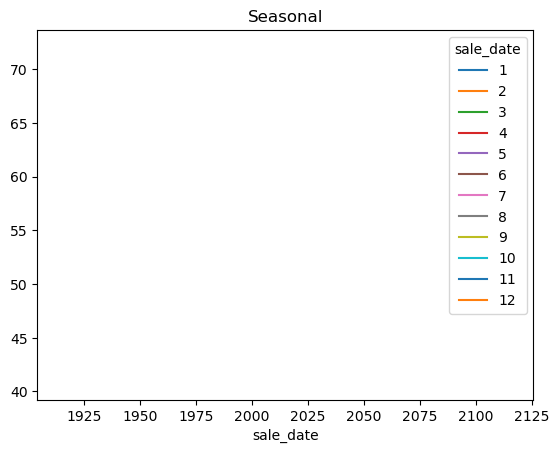

In [16]:
train.groupby([train.index.month,train.index.year])['sales_total'].mean().unstack(0).plot(title='Seasonal')

## Analyzing for Month

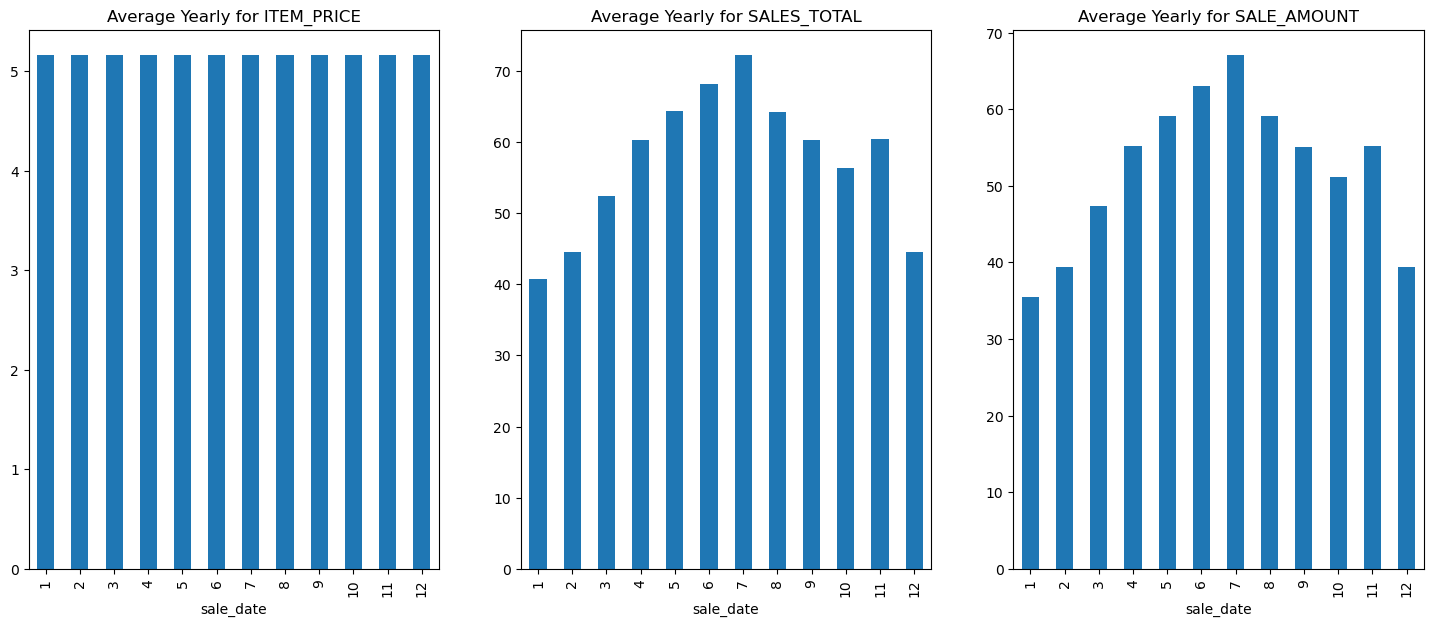

In [17]:
plt.figure(figsize=(18,7))
for i, col in enumerate(columns):
    subplot_num = i+1
    plt.subplot(1,3,subplot_num)
    plt.title(f'Average Yearly for {col.upper()}')
    store.groupby(store.index.month)[col].mean().plot(kind='bar')
    plt.grid(False)
plt.show()

## Analyzing by Day of The Week

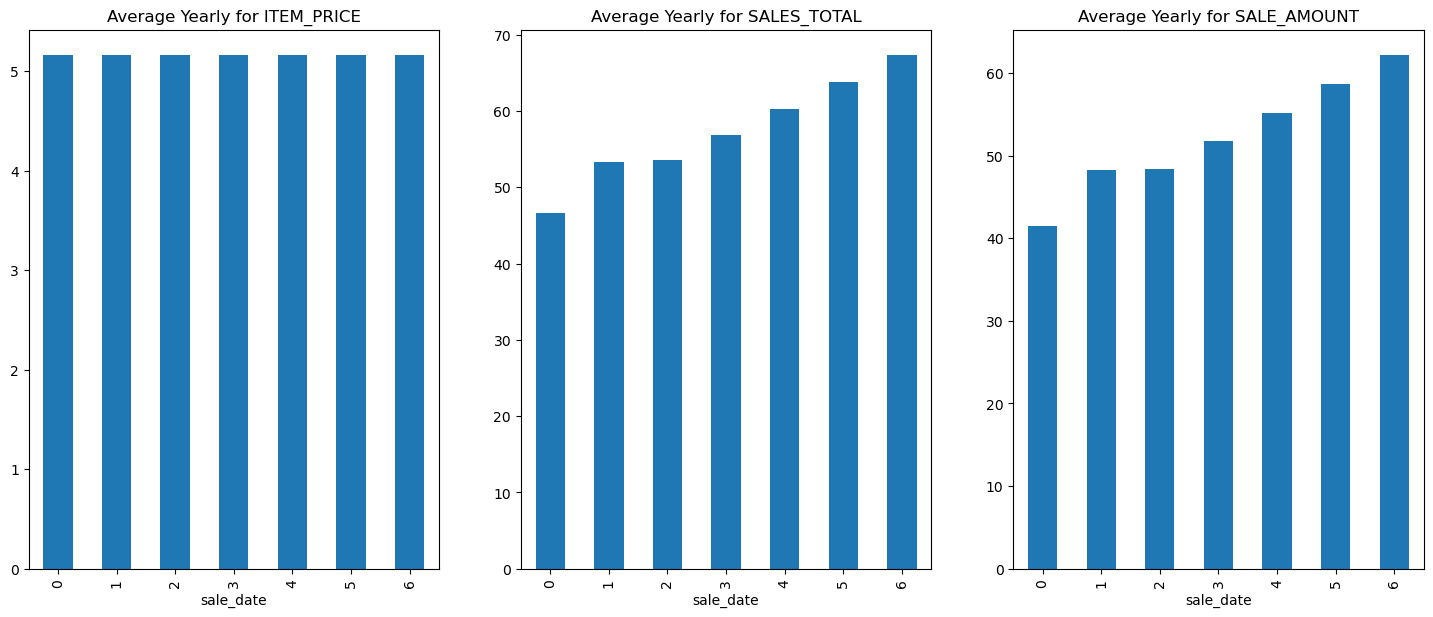

In [18]:
plt.figure(figsize=(18,7))
for i, col in enumerate(columns):
    subplot_num = i+1
    plt.subplot(1,3,subplot_num)
    plt.title(f'Average Yearly for {col.upper()}')
    store.groupby(store.index.day_of_week)[col].mean().plot(kind='bar')
    plt.grid(False)
plt.show()

## Finding differences within years
    - Item price remained the same throughout the years

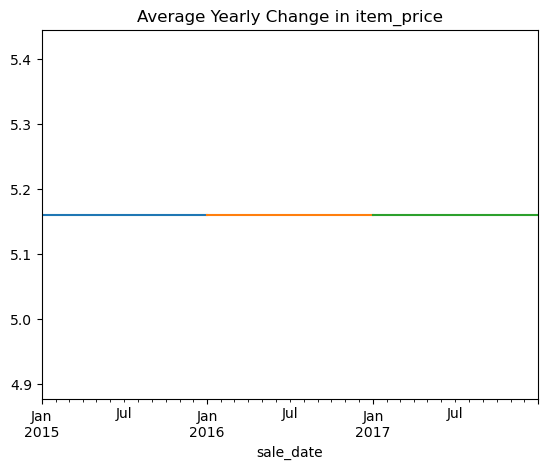

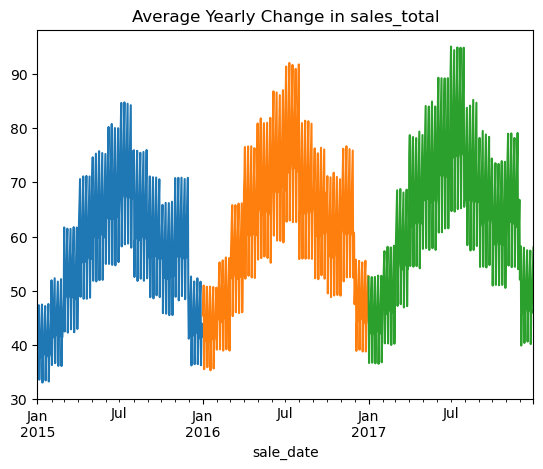

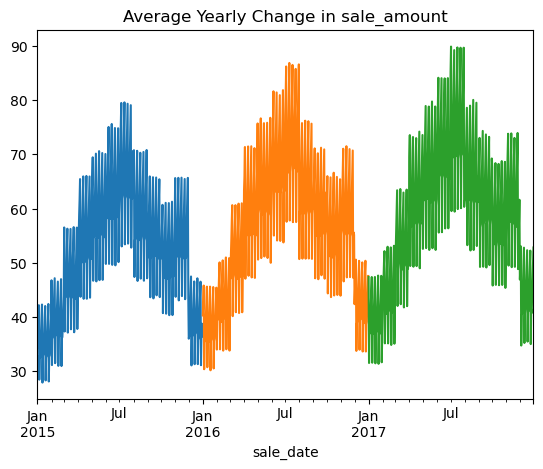

In [19]:
for col in columns:
    train.resample('D')[col].mean().plot(title=f'Average Yearly Change in {col}')
    validate.resample('D')[col].mean().plot(title=f'Average Yearly Change in {col}')
    test.resample('D')[col].mean().plot(title=f'Average Yearly Change in {col}')
    plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

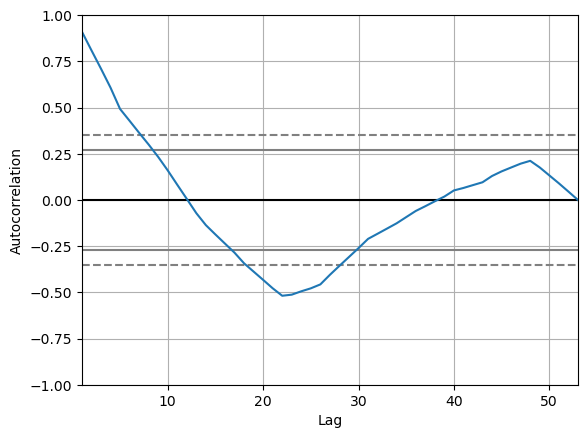

In [20]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('W').mean())

In [21]:
sm.decomposition.

SyntaxError: invalid syntax (2651962132.py, line 1)

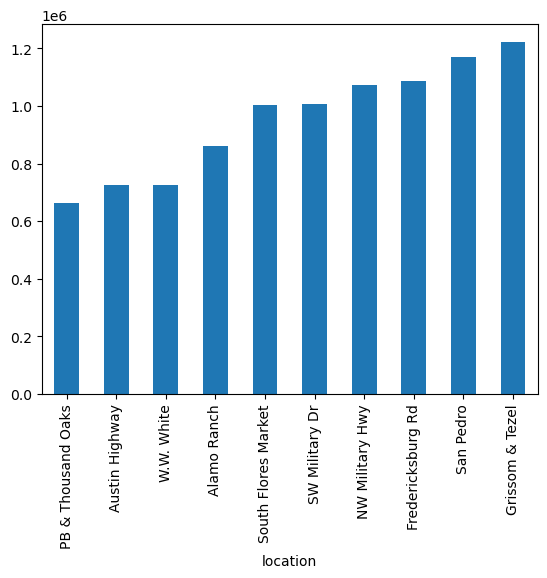

In [46]:
train.groupby('location')['sale_amount'].sum().sort_values().plot(kind='bar')
plt.show()

In [47]:
train.location.value_counts()

location
Alamo Ranch            18250
Grissom & Tezel        18250
Fredericksburg Rd      18250
South Flores Market    18250
Austin Highway         18250
W.W. White             18250
PB & Thousand Oaks     18250
San Pedro              18250
SW Military Dr         18250
NW Military Hwy        18250
Name: count, dtype: int64

In [48]:
train.groupby('item_id')['location'].value_counts()

item_id  location           
1        Alamo Ranch            365
         Austin Highway         365
         W.W. White             365
         South Flores Market    365
         San Pedro              365
                               ... 
50       Grissom & Tezel        365
         Fredericksburg Rd      365
         Austin Highway         365
         Alamo Ranch            365
         W.W. White             365
Name: count, Length: 500, dtype: int64